In [46]:
import numpy as np
import scipy as sc
from scipy.optimize import curve_fit as cf
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
def sixth_order(x, a, b, c, d, e, f, g):
    return a * pow(x,6) + b * pow(x,5) + c * pow(x,4) + d* pow(x,3) + e * pow(x,2) + f * pow(x,1) + g

def seventh_order(x, a, b, c, d, e, f, g, h):
    return sixth_order(x, a, b, c, d, e, f, g) * x + h

Current conversion: converted = ((raw / 1024) - 0.2) * 5000


In [47]:
data = pd.read_csv("high_pt_characterization_10_10")

In [48]:
data['raw'] = (data[' converted'] / 5000 + 0.2) * 1024


In [49]:
data

,digital,converted,raw
0,700,580,323.584
1,730,615,330.752
2,805,665,340.992
3,890,740,356.352
4,990,820,372.736
5,1100,910,391.168
6,1200,980,405.504
7,1351,1120,434.176
8,1450,1200,450.560
9,1580,1300,471.040


In [39]:
res, cov = cf(sixth_order, data[' converted'], data['digital'])

In [40]:
res

array([ 3.71954700e-19, -7.78629364e-15,  7.86479608e-11, -2.94203391e-07,
        5.00441237e-04,  8.44508472e-01,  8.86714028e+01])

In [41]:
x = np.linspace(0,5000)
p = sixth_order(x, res[0], res[1], res[2], res[3], res[4], res[5], res[6])

In [44]:
sixth_order(3100, res[0], res[1], res[2], res[3], res[4], res[5], res[6])

4115.540477108054

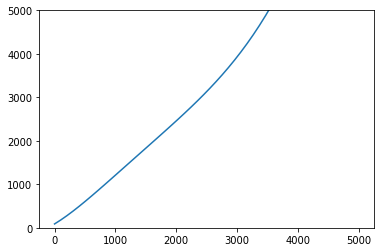

In [43]:
plt.ylim(0, 5000)
plt.plot(x, p)

In [50]:
f = interp1d(data[' converted'], data['digital'], kind='quadratic')

In [68]:
f(800)

array(964.93014728)

In [66]:
f(1800)

array(2180.)